In [2]:
import pandas as pd
import numpy as np
dtype=np.float64
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn 
import string
import re
from IPython.display import display, Latex, Markdown
from sklearn.dummy import DummyClassifier
import os

In [3]:
df = pd.read_csv('data/best_value_data.csv')
df.head()

,INSTNM,ST_FIPS,STABBR,LATITUDE,LONGITUDE,SAT_AVG,UNITID,OPEID6,CONTROL,MAIN,...,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,BESTVALUE
0,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,25,36250,376,37194,33,33,54300,17.0,16.0,1.497931
1,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,46,31505,327,33085,32,31,25400,24.0,33.0,0.806221
2,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,22,34809,361,36482,33,31,54500,19.0,11.0,1.565687
3,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0,1.240251
4,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,39,29956,311,30970,30,30,24000,28.0,28.0,0.801175


In [4]:
df_data = df[['INSTNM', 'CIPDESC', 'DEBTMEAN','MD_EARN_WNE','BESTVALUE' ]]
df_data = df_data[df_data['DEBTMEAN']!='PrivacySuppressed']
df_data = df_data[df_data['MD_EARN_WNE']!='PrivacySuppressed']
df_data.head()

C:\Users\Alexander\Anaconda2\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,INSTNM,CIPDESC,DEBTMEAN,MD_EARN_WNE,BESTVALUE
0,Alabama A & M University,"Computer and Information Sciences, General.",37194,54300,1.497931
1,Alabama A & M University,Teacher Education and Professional Development...,33085,25400,0.806221
2,Alabama A & M University,"Electrical, Electronics and Communications Eng...",36482,54500,1.565687
3,Alabama A & M University,Mechanical Engineering.,38900,45800,1.240251
4,Alabama A & M University,"Liberal Arts and Sciences, General Studies and...",30970,24000,0.801175


In [5]:
#taking average of best value score based on major
df_major = df_data
columns = ['Major','Average Debt','Earnings','Average Best Value Score']
unique_major = df_data.CIPDESC.unique()
tempdf =pd.DataFrame(columns = columns)
for major in unique_major:
    group_of_major = df_major.loc[df_major['CIPDESC']== major]
    tempdf = tempdf.append({'Major' : major , 'Average Debt' :np.asarray(group_of_major['DEBTMEAN'], dtype=np.float).mean(), 
                            'Earnings' : group_of_major['MD_EARN_WNE'].mean(),
                            'Average Best Value Score' : group_of_major['BESTVALUE'].mean()} , ignore_index=True)
    
df_major = tempdf
df_major.head()

,Major,Average Debt,Earnings,Average Best Value Score
0,"Computer and Information Sciences, General.",22931.943548,57665.725806,2.670863
1,Teacher Education and Professional Development...,24212.138996,34247.876448,1.448755
2,"Electrical, Electronics and Communications Eng...",23202.419689,67137.305699,2.998553
3,Mechanical Engineering.,22191.977099,62494.274809,2.856958
4,"Liberal Arts and Sciences, General Studies and...",24027.044304,30221.835443,1.357815


In [37]:
#taking average of best value score based on school
df_school = df_data
columns = ['School','Average Debt','Earnings','Average Best Value Score']
unique_school = df_data.INSTNM.unique()
tempdf =pd.DataFrame(columns = columns)
for school in unique_school:
    group_of_school = df_school.loc[df_school['INSTNM']== school]
    tempdf = tempdf.append({'School' : school , 'Average Debt' :np.asarray(group_of_school['DEBTMEAN'], dtype=np.float).mean(), 
                            'Earnings' : group_of_school['MD_EARN_WNE'].mean(),
                           'Average Best Value Score' : group_of_school['BESTVALUE'].mean()} , ignore_index=True)
    
df_school = tempdf
df_school.head()

,School,Average Debt,Earnings,Average Best Value Score
0,Alabama A & M University,34962.142857,37771.428571,1.095372
1,University of Alabama at Birmingham,25585.160000,38896.000000,1.570209
2,University of Alabama in Huntsville,25302.333333,50266.666667,2.004191
3,Alabama State University,32709.125000,25662.500000,0.776373
4,The University of Alabama,22691.952381,38711.904762,1.635502


In [6]:
#Adding column for if best value score is below this threshold than its classified as a bad investment for all schools/major
threshold = 1.5 
df_all_schools = df_data
temp = []
for entry in df_all_schools['BESTVALUE']:
    if(entry > 1.5):
        temp.append(True)
    else:
        temp.append(False)

df_all_schools['Good Investment'] = temp
df_all_schools.head()
out_filepath = os.path.join("data", "all_school_classifier.csv")
df_all_schools.to_csv(out_filepath, index=False)

# print(len(df_all_schools))
# print(len(df_all_schools['Good Investment'] ))

In [6]:
#Adding column for if best value score is below this threshold than its classified as a bad investment
threshold = 1.5 
temp = []
for entry in df_major['Average Best Value Score']:
    if(entry > 1.5):
        temp.append(True)
    else:
        temp.append(False)

df_major['Good Investment'] = temp
df_major.head()
out_filepath = os.path.join("data", "major_classifier.csv")
df_major.to_csv(out_filepath, index=False)


In [38]:
#Adding column for if best value score is below this threshold than its classified as a bad investment
threshold = 1.5 
temp = []
for entry in df_school['Average Best Value Score']:
    if(entry > 1.5):
        temp.append(True)
    else:
        temp.append(False)

df_school['Good Investment'] = temp
df_school.head()
out_filepath = os.path.join("data", "school_classifier.csv")
df_school.to_csv(out_filepath, index=False)


In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.dummy import DummyClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
#learner for all schools and majors
learner = sklearn.svm.SVC(kernel = 'linear',gamma='auto')

X , y = df_all_schools[['DEBTMEAN', 'MD_EARN_WNE']].values.tolist(), df_all_schools['Good Investment']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
prediction = dummy_clf.predict(X_test)
print("Baseline Classifier Accuracy:",metrics.accuracy_score(y_test, prediction))

learner.fit(X_train, y_train)
prediction = learner.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, prediction))


Baseline Classifier Accuracy: 0.4988656415427275
SVM Accuracy: 0.9432820771363751


In [11]:
#plot for result on all schools and majors
print(prediction)

[ True False False ...  True  True  True]


('Baseline Classifier Accuracy:', 0.4782608695652174)
('SVM Accuracy:', 0.9565217391304348)


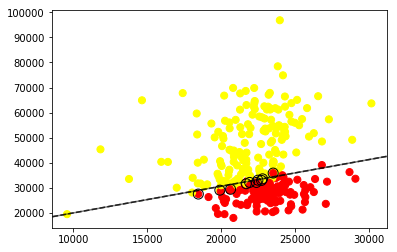

In [36]:
# learner for major
learner = sklearn.svm.SVC(kernel = 'linear',gamma='auto')

X , y = df_major[['Average Debt', 'Earnings']].values.tolist(), df_major['Good Investment']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
prediction = dummy_clf.predict(X_test)
print("Baseline Classifier Accuracy:",metrics.accuracy_score(y_test, prediction))


learner.fit(X_train, y_train)
prediction = learner.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, prediction))
plot_SVM_results(df_major, learner)

In [35]:
def plot_SVM_results(df, learner):

    df_plot=df.replace(False, 0)
    df_plot=df.replace(True, 1)
    X=df_plot.iloc[:,1:3]
    y=df_plot['Good Investment']
    #plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
    #plt.scatter(learner.support_vectors_[:,0],learner.support_vectors_[:,1])

    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = learner.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(learner.support_vectors_[:, 0], learner.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
    return

SyntaxError: 'return' outside function (<ipython-input-35-d22282214322>, line 27)

('Baseline Classifier Accuracy:', 0.4965034965034965)
('SVM Accuracy:', 0.8951048951048951)


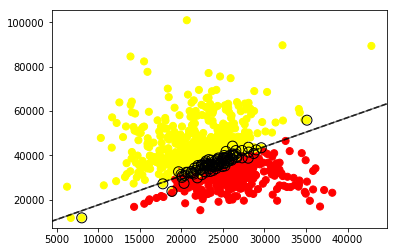

In [39]:
learner = sklearn.svm.SVC(kernel = 'linear',gamma='auto')

X , y = df_school[['Average Debt', 'Earnings']].values.tolist(), df_school['Good Investment']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
prediction = dummy_clf.predict(X_test)
print("Baseline Classifier Accuracy:",metrics.accuracy_score(y_test, prediction))

learner.fit(X_train, y_train)
prediction = learner.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, prediction))
plot_SVM_results(df_school, learner)

In [15]:
#plotting results for schools